<h3>Happiness vs Averge Income by Country : Using K-Mean Clustering</h3>
<br>I'm interested in seeing if there is a relationship between happiness and GDE (per capita). I'm  going to use K-Mean custering techniques and python, to carry out my analysis.

Data for this analysis comes from the World Happiness Report - available from https://www.kaggle.com/unsdsn/world-happiness). The study ranks 155 countries by their happiness levels and was released by the United Nations.
<p>
First, I'm going to import the data from the downloaded csv file and put the data into a panda dataframe to view

In [95]:
import pandas as pd
data = pd.read_csv('happy.csv')
data.head(5)

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


Next I going to create two subdatasets, happy and income from columns of the spreadsheet. <br>
Whats the maximum income in the dataset?

In [97]:
happy = data['happyScore']
income = data['avg_income']
income.max()

26182.275

Now, its time to plot the data using matlablib

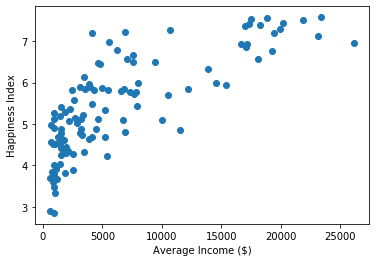

In [99]:
import matplotlib.pyplot as plt

plt.xlabel('Average Income ($)')
plt.ylabel('Happiness Index')
plt.scatter(income,happy)

The following sections, sorts the data from richest to poorest
and then creating a subset of the richest countries

In [105]:
import numpy as np

data.sort_values('avg_income', inplace=True)

richest = data[ data['avg_income'] > 10000]

richest_mean = np.mean(richest['avg_income'])
all_mean = np.mean(data['avg_income'])

print(richest_mean, all_mean)

17500.31535714286 6442.751416214639


Next I'm going to pot this 'richest' subset and label the richest few countries. Interestingly the richest few countries arent all the happiest - although Norway and Switzerland are doing something right!

Text(0, 0.5, 'Happiness Index')

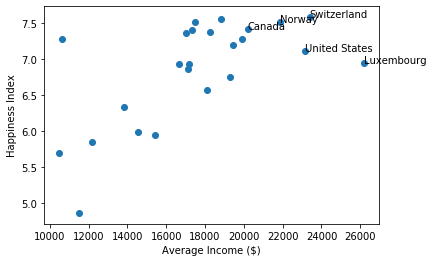

In [106]:
#plot the richest countries
plt.scatter(richest['avg_income'], 
            richest['happyScore'])

#label the richest 5 countries
for x in range(-1,-6,-1):
    plt.text(richest.iloc[x]['avg_income'], 
            richest.iloc[x]['happyScore'],
          richest.iloc[x]['country'] )
plt.xlabel('Average Income ($)')
plt.ylabel('Happiness Index')

Finally, going to use K-Mean clusting on the dataset, with 2 centers and then plot.

Text(572.88, 2.905, 'Burundi')

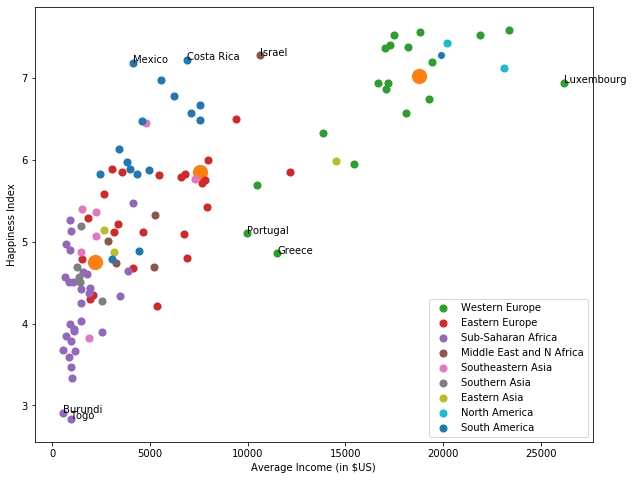

In [185]:
from sklearn.cluster import KMeans
import numpy as np

#combine the income and happy lists into one
happy_gdp = np.column_stack((income, happy))

#run KMeans with 3 cluster points
km_res = KMeans(n_clusters=3).fit(happy_gdp)

#assign x,y coords of clusters
clusters = km_res.cluster_centers_

#create plot
plt.figure(figsize=(10,8))
plt.scatter(income,happy)
plt.scatter(clusters[:,0], clusters[:,1], s=200)
plt.xlabel('Average Income (in $US)')
plt.ylabel('Happiness Index')

#Divide Dataset by Region
westeurope = data[ data['region'] == "'Western Europe'"]
easteurope = data[ data['region'] == "'Central and Eastern Europe'"]
africa = data[ data['region'] == "'Sub-Saharan Africa'" ]
me = data[ data['region'] == "'Middle East and Northern Africa'" ]
asia = data[ data['region'] == "'Southeastern Asia'" ]
sasia = data[ data['region'] == "'Southern Asia'" ]
easia = data[ data['region'] == "'Eastern Asia'" ]
sa = data[ data['region'] == "'Latin America and Caribbean'"]
na = data[ data['region'] == "'North America'" ]


#Plot data by Region
we = plt.scatter(westeurope['avg_income'], westeurope['happyScore'], s=50)
ee = plt.scatter(easteurope['avg_income'], easteurope['happyScore'], s=50)
a = plt.scatter(africa['avg_income'], africa['happyScore'], s=50)
me = plt.scatter(me['avg_income'], me['happyScore'], s=50)
asia = plt.scatter(asia['avg_income'], asia['happyScore'], s=50)
sasia = plt.scatter(sasia['avg_income'], sasia['happyScore'], s=50)
easia = plt.scatter(easia['avg_income'], easia['happyScore'], s=50)
na = plt.scatter(na['avg_income'], na['happyScore'], s=50)
sa = plt.scatter(sa['avg_income'], sa['happyScore'], s=50)
plt.legend((we,ee,a, me,asia,sasia,easia,na,sa),
           ('Western Europe',"Eastern Europe",
           'Sub-Saharan Africa','Middle East and N Africa', 
            'Southeastern Asia', 'Southern Asia', 'Eastern Asia',
           'North America', 'South America')
          )


#labelling the outliers

#the richess country 
plt.text(richest.iloc[-1]['avg_income'], 
            richest.iloc[-1]['happyScore'],
          richest.iloc[-1]['country'] )

#two countries with happiness much lower than average income
plt.text(data.iloc[89]['avg_income'], 
            data.iloc[89]['happyScore'],
          data.iloc[89]['country'] )

plt.text(data.iloc[86]['avg_income'], 
            data.iloc[86]['happyScore'],
          data.iloc[86]['country'] )

#3 countries with happiness much higher than average income would suggest
plt.text(data.iloc[59]['avg_income'], 
            data.iloc[59]['happyScore'],
          data.iloc[59]['country'] )

plt.text(data.iloc[88]['avg_income'], 
            data.iloc[88]['happyScore'],
          data.iloc[88]['country'] )

plt.text(data.iloc[75]['avg_income'], 
            data.iloc[75]['happyScore'],
          data.iloc[75]['country'] )

#the two countries with the lowest happiness (and lowest income)
plt.text(data.iloc[10]['avg_income'], 
            data.iloc[10]['happyScore'],
          data.iloc[10]['country'] )

plt.text(data.iloc[0]['avg_income'], 
            data.iloc[0]['happyScore'],
          data.iloc[0]['country'] )

Overall, there does seem to be a trend between the happiness and average income in US$.
<p>
There are a number of interesting points of interest on the diagram. The richest country was Luxembourg but it was not the happiest - the happiest countries had an average income around the 20k mark. Portugal and Greece were significantly lower on the happiness score than their income would suggest - is this because of the hangover from the financial crash of 2008-2009? Mexico, Costa Rica and Israel were much happier than their income would suggest, whilst both Burundi and Togo were way off the scale for income and also happiness.

Three clsuters of countries have been identified (shown as large orange circles). These can be characterised as:
    (i) poor and unhappy countries (e.g Togo)
    (ii) relatively poor but happy countries (e.g. Mexico)
    (iii) rich and happy countries (e.g. Luxenbourg)